### Importing libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

### Reading Data

In [27]:
df = pd.read_csv("data.csv")

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### UNDESTAND DATA

In [29]:
## 1. PasengerID : ID assigned to each passenger .
## 2. Survived : Whther a person survived or not . 0- Not survived , 1-Survived
## 3. PClass : Which class was person travelling
## 4. Name : Name of the person
## 5. Gender : Gender of person . whther male or female
## 6. Age : Age of the person
## 7. SibSp :  the number of siblings or spouses aboard the Titanic for each passenger
## 8. Parch :  number of parents or children aboard the Titanic with each passenge
## 9. Ticket : Ticket number of each person
## 10. Fare : Price for ticket paid by each person
## 11. Embarked : Station from which perosn take the titanic

"""
C: Cherbourg, France
Q: Queenstown (now Cobh), Ireland
S: Southampton, England
"""
## 12. Cabin : In which cabin perosn was staying

In [30]:
"""
IDENTIFY WHICH COLUMNS ARE USEFUL FOR US AND WHICH ARE NOT USEFUL
"""

'\nIDENTIFY WHICH COLUMNS ARE USEFUL FOR US AND WHICH ARE NOT USEFUL\n'

### Basic Operation

In [31]:
df.shape

(891, 12)

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df.duplicated().sum()

0

In [34]:
"""
1. Cabin : lots of missing values
2. Name : It is name assigned to each person . We do Data Analysis in group/bunch of Data not individually . So we are removing it here .
          Some time name may also be important . Depends on th situation.
3. PassengerID : Here PassengerID is same as index . We have a single dataframe only we dont have to join it to another dataframe so we dont need 
                this columns also rightnow.
4.Ticket : Smae reason as name

"""

'\n1. Cabin : lots of missing values\n2. Name : It is name assigned to each person . We do Data Analysis in group/bunch of Data not individually . So we are removing it here .\n          Some time name may also be important . Depends on th situation.\n3. PassengerID : Here PassengerID is same as index . We have a single dataframe only we dont have to join it to another dataframe so we dont need \n                this columns also rightnow.\n4.Ticket : Smae reason as name\n\n'

In [35]:
df.drop(['Cabin','Ticket','PassengerId','Name'], axis=1 , inplace=True)

In [36]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [37]:
df.dropna(inplace=True)

In [38]:
df.shape

(712, 8)

In [39]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Gender    712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [49]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### NOW LOOK AT EACH COLUMN SPECIFICALLY

In [50]:
df.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
"""
CHECK WHICH ARE CATEGORICAL AND NUMERICAL

CATGRORICAL : Survived , PCLass , Gender,  Embarked , SibSp , ParCH ,
NUMERICAL : Age , Fare

Looking at Categorical first
"""

#### 1. Survived

In [40]:
df["Survived"].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

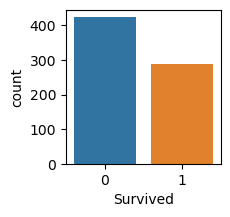

In [47]:
plt.figure(figsize=(2,2))
sns.countplot(x="Survived",data=df)

#### 2. PClass

In [51]:
df["Pclass"].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

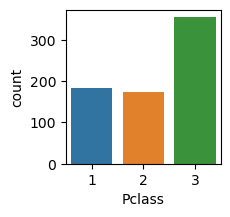

In [52]:
plt.figure(figsize=(2,2))
sns.countplot(x="Pclass",data=df)

#### 3. Gender

In [53]:
df["Pclass"].value_counts()

Pclass
3    355
1    184
2    173
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

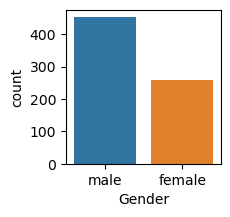

In [54]:
plt.figure(figsize=(2,2))
sns.countplot(x="Gender",data=df)

#### 4. Embarked`

<Axes: xlabel='Embarked', ylabel='count'>

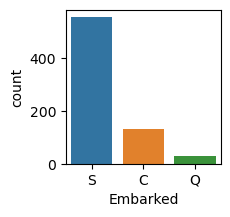

In [55]:
plt.figure(figsize=(2,2))
sns.countplot(x="Embarked",data=df)

### 5. SibSP

In [64]:
df["SibSp"].value_counts()

SibSp
0    469
1    183
2     25
4     18
3     12
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

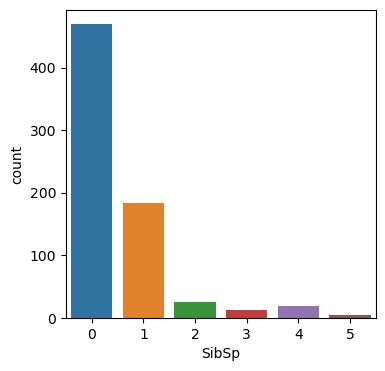

In [65]:
plt.figure(figsize=(4,4))
sns.countplot(x="SibSp",data=df)

#### 6. ParCH

In [66]:
df["Parch"].value_counts()

Parch
0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

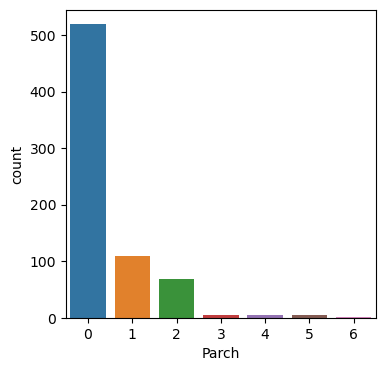

In [68]:
plt.figure(figsize=(4,4))
sns.countplot(x="Parch",data=df)

#### 7. Age

In [56]:
df["Age"].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

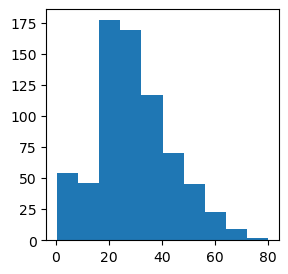

In [60]:
plt.figure(figsize=(3,3))
plt.hist(df["Age"])
plt.show()

#### 8. Fare

In [69]:
df["Fare"].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

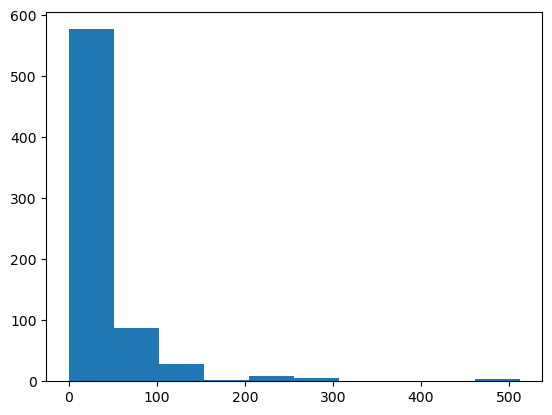

In [71]:
plt.hist(df["Fare"])
plt.show()

## GET SOME MORE INSIGHTS

### 1. Survived with Gender

In [72]:
df.head(2)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [79]:
grouped_data=df.groupby(['Gender', 'Survived']).size().unstack()
grouped_data

Survived,0,1
Gender,,
female,64,195
male,360,93


<Figure size 300x300 with 0 Axes>

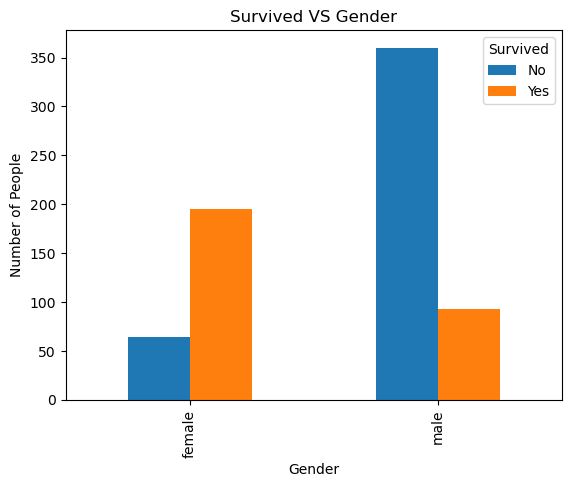

In [84]:
plt.figure(figsize=(3,3))

grouped_data.plot(kind='bar', stacked=False)

plt.title('Survived VS Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

"""
The survival ratio of female is much greater than that of male. 
"""

### 2. PCLASS and Survived

In [90]:
grouped_data = df.groupby(['Pclass', 'Survived']).size().unstack()

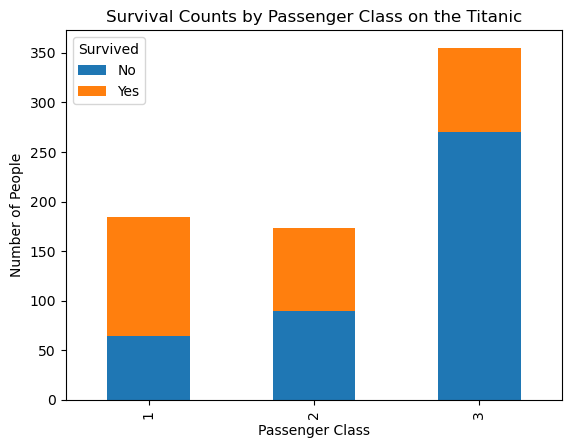

In [91]:
# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.title('Survived VS PCLASS')
plt.xlabel('Passenger Class')
plt.ylabel('Number of People')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

"""
Wow.... That looks amazing. It is usually said that Money can't buy Everything,
But it is clearly seen that pasangers of Class 1 are given high priority while Rescue.
"""

#### 3. Survival Rate by Age

C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


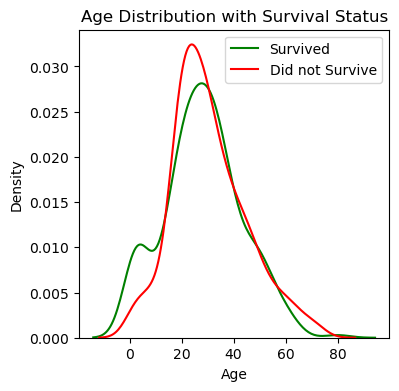

In [101]:
plt.figure(figsize=(4,4))
sns.kdeplot(df[df['Survived'] == 1]['Age'], color='green', label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], color='red', label='Did not Survive')
plt.title('Age Distribution with Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
"""
DO Survival rate by Embarked Yourself for Practice
"""

### 4. Survival Rate by Fare

C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


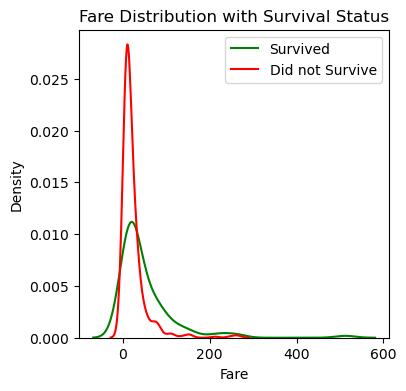

In [103]:
plt.figure(figsize=(4,4))
sns.kdeplot(df[df['Survived'] == 1]['Fare'], color='green', label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Fare'], color='red', label='Did not Survive')
plt.title('Fare Distribution with Survival Status')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

In [105]:
corr_matrix = df.corr()

ValueError: could not convert string to float: 'male'

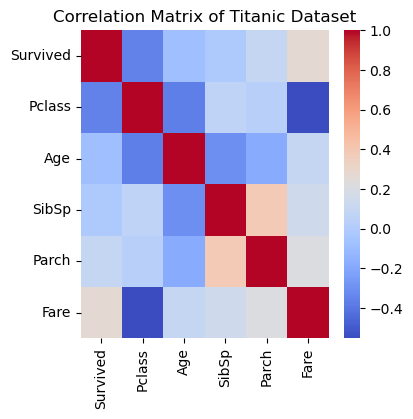

In [108]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f' )
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 400x400 with 0 Axes>

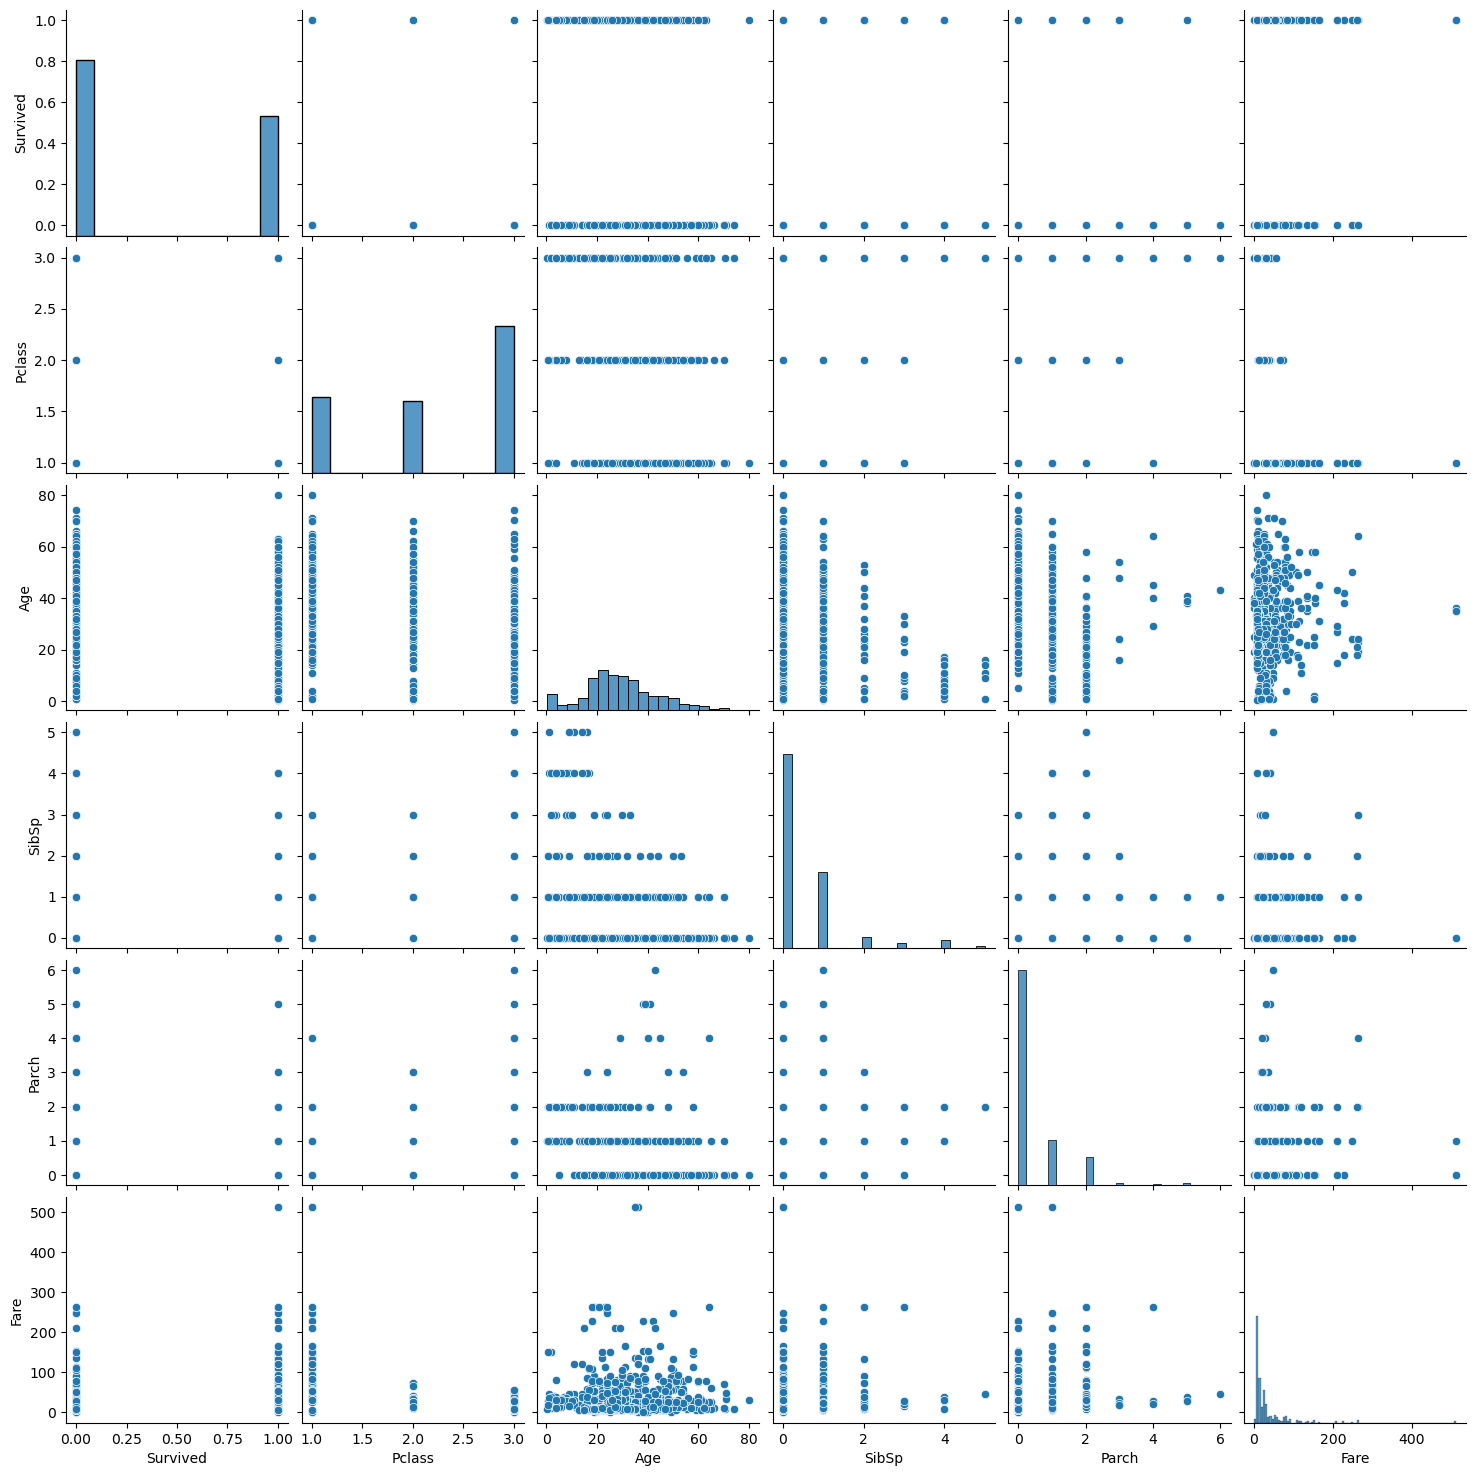

In [110]:
plt.figure(figsize=(4,4))
sns.pairplot(df)

### 6. AGE vs Gender

C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gusai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


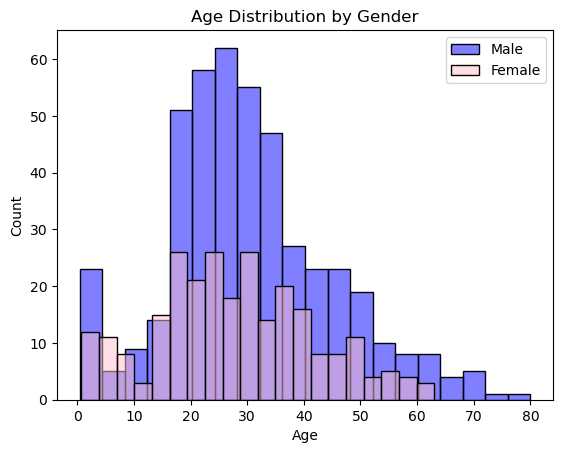

In [121]:
male_data = df[df['Gender'] == 'male']
female_data = df[df['Gender'] == 'female']

# Plot histograms for each gender separately
sns.histplot(data=male_data, x='Age', bins=20, color='blue', alpha=0.5, label='Male')
sns.histplot(data=female_data, x='Age', bins=20, color='pink', alpha=0.5, label='Female')

plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()